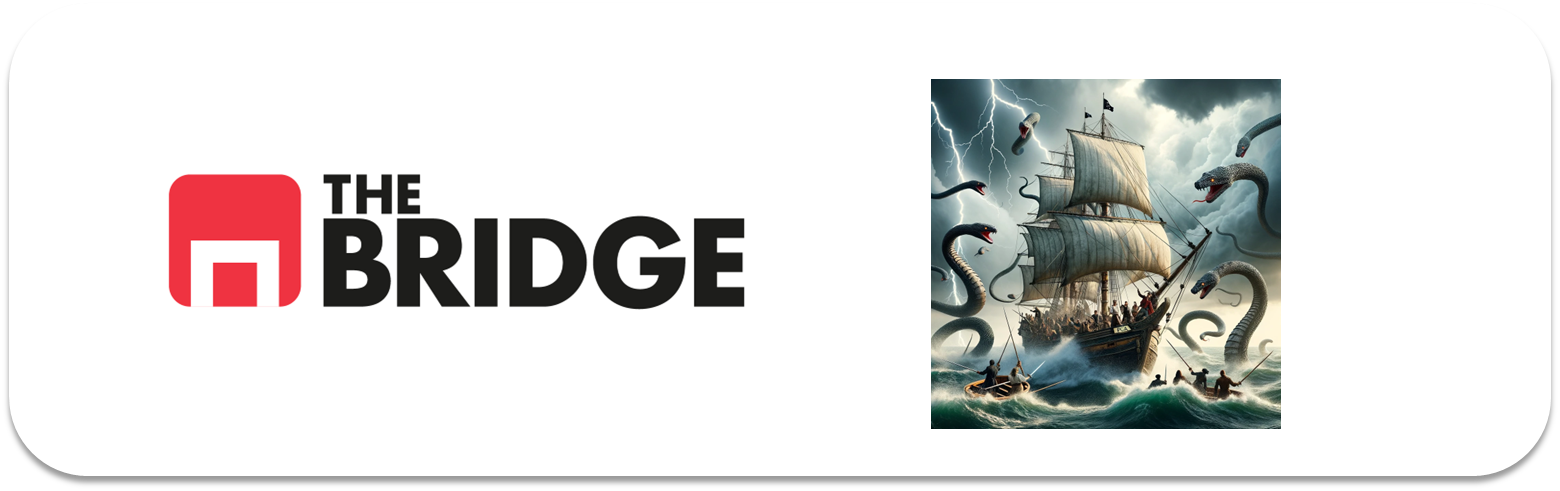

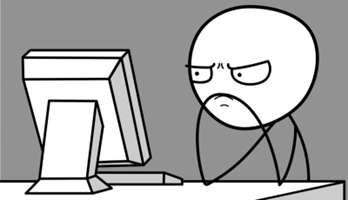

Para ejercitarte y afianzar lo aprendido sobre **Seleccion de Features**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

## Feature selection: Breast Cancer Winsconsin

El objetivo de este grupo de ejercicio es dar a entender la importancia de la selección de características (features), así como probar distintos métodos de reducción de características (features) y qué influencia puede tener el reducir features en el perfomance de un modelo. Nuestro target para evaluar el perfomance será si estamos ante tumores malignos o benignos.

Vamos a trabajar con el dataset de Breast Cancer Winsconsin, datos tomados a partir de radiografías.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [103]:
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
import Toolbox_datascience as tds
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score


In [87]:
importlib.reload(tds)

<module 'Toolbox_datascience' from 'c:\\Users\\rodri\\Git_Repositories\\ONLINE_DS_THEBRIDGE_ROD\\Sprint_14\\Unidad_02\\Ejercicios_Workout\\Toolbox_datascience.py'>

### Ejercicio 1:

Carga los datos y haz una primera inspección de los mismos y comenta lo que creas conveniente sobre las features y su relación entre sí (pero sin analizarlas numéricamente)

In [88]:
df = pd.read_csv('./data/breastcancer-winsconsin.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [89]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
le = LabelEncoder()

# Aplicar el LabelEncoder a la columna 'diagnosis'
df['diagnosis_encoded'] = le.fit_transform(df['diagnosis'])

# Verificar los resultados
print(df[['diagnosis', 'diagnosis_encoded']].head())


  diagnosis  diagnosis_encoded
0         M                  1
1         M                  1
2         M                  1
3         M                  1
4         M                  1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [91]:
tds.describe_df(df)

COL_N             id diagnosis radius_mean texture_mean perimeter_mean  \
DATA_TYPE      int64    object     float64      float64        float64   
MISSINGS (%)     0.0       0.0         0.0          0.0            0.0   
UNIQUE_VALUES    569         2         456          479            522   
CARDIN (%)       1.0       0.0         0.8         0.84           0.92   

COL_N         area_mean smoothness_mean compactness_mean concavity_mean  \
DATA_TYPE       float64         float64          float64        float64   
MISSINGS (%)        0.0             0.0              0.0            0.0   
UNIQUE_VALUES       539             474              537            537   
CARDIN (%)         0.95            0.83             0.94           0.94   

COL_N         concave points_mean  ... perimeter_worst area_worst  \
DATA_TYPE                 float64  ...         float64    float64   
MISSINGS (%)                  0.0  ...             0.0        0.0   
UNIQUE_VALUES                 542  ...             514        544   
CARDIN (%)                   0.95  ...             0.9       0.96   

COL_N         smoothness_worst compactness_worst concavity_worst  \
DATA_TYPE              float64           float64         float64   
MISSINGS (%)               0.0               0.0             0.0   
UNIQUE_VALUES              411               529             539   
CARDIN (%)                0.72              0.93            0.95   

COL_N         concave points_worst symmetry_worst fractal_dimension_worst  \
DATA_TYPE                  float64        float64                 float64   
MISSINGS (%)                   0.0            0.0                     0.0   
UNIQUE_VALUES                  492            500                     535   
CARDIN (%)                    0.86           0.88                    0.94   

COL_N         Unnamed: 32 diagnosis_encoded  
DATA_TYPE         float64             int32  
MISSINGS (%)        100.0               0.0  
UNIQUE_VALUES           0                 2  
CARDIN (%)            0.0               0.0  

[4 rows x 34 columns]

In [92]:
tds.clasifica_variables(df,10,10)

nombre_variable      tipo_sugerido
0                        id  Numérica Discreta
1                 diagnosis            Binaria
2               radius_mean  Numérica Discreta
3              texture_mean  Numérica Discreta
4            perimeter_mean  Numérica Discreta
5                 area_mean  Numérica Discreta
6           smoothness_mean  Numérica Discreta
7          compactness_mean  Numérica Discreta
8            concavity_mean  Numérica Discreta
9       concave points_mean  Numérica Discreta
10            symmetry_mean  Numérica Discreta
11   fractal_dimension_mean  Numérica Discreta
12                radius_se  Numérica Discreta
13               texture_se  Numérica Discreta
14             perimeter_se  Numérica Discreta
15                  area_se  Numérica Discreta
16            smoothness_se  Numérica Discreta
17           compactness_se  Numérica Discreta
18             concavity_se  Numérica Discreta
19        concave points_se  Numérica Discreta
20              symmetry_se  Numérica Discreta
21     fractal_dimension_se  Numérica Discreta
22             radius_worst  Numérica Discreta
23            texture_worst  Numérica Discreta
24          perimeter_worst  Numérica Discreta
25               area_worst  Numérica Discreta
26         smoothness_worst  Numérica Discreta
27        compactness_worst  Numérica Discreta
28          concavity_worst  Numérica Discreta
29     concave points_worst  Numérica Discreta
30           symmetry_worst  Numérica Discreta
31  fractal_dimension_worst  Numérica Discreta
32              Unnamed: 32         Categórica
33        diagnosis_encoded            Binaria

### Ejercicio 2:

Descarta las características que evidentemente no aportan información.

In [93]:
df.drop("Unnamed: 32", axis=1, inplace=True)
df.drop("diagnosis", axis=1, inplace=True)

### Ejercicio 3: 

Divide en train y test. Analiza el target de forma breve.

In [94]:
target = "diagnosis_encoded"
features_num = df.select_dtypes(include='float64').columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(df[features_num], df[target], test_size=0.2, random_state=42)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)


### Ejercicio 4: MiniEDA (I) Análisis Visual

Realiza un análisis visual de las features y haz tu selección de primera "división" (que luego usaremos para comparar con otros métodos de selección).

In [95]:
print(type(features_num))

<class 'list'>


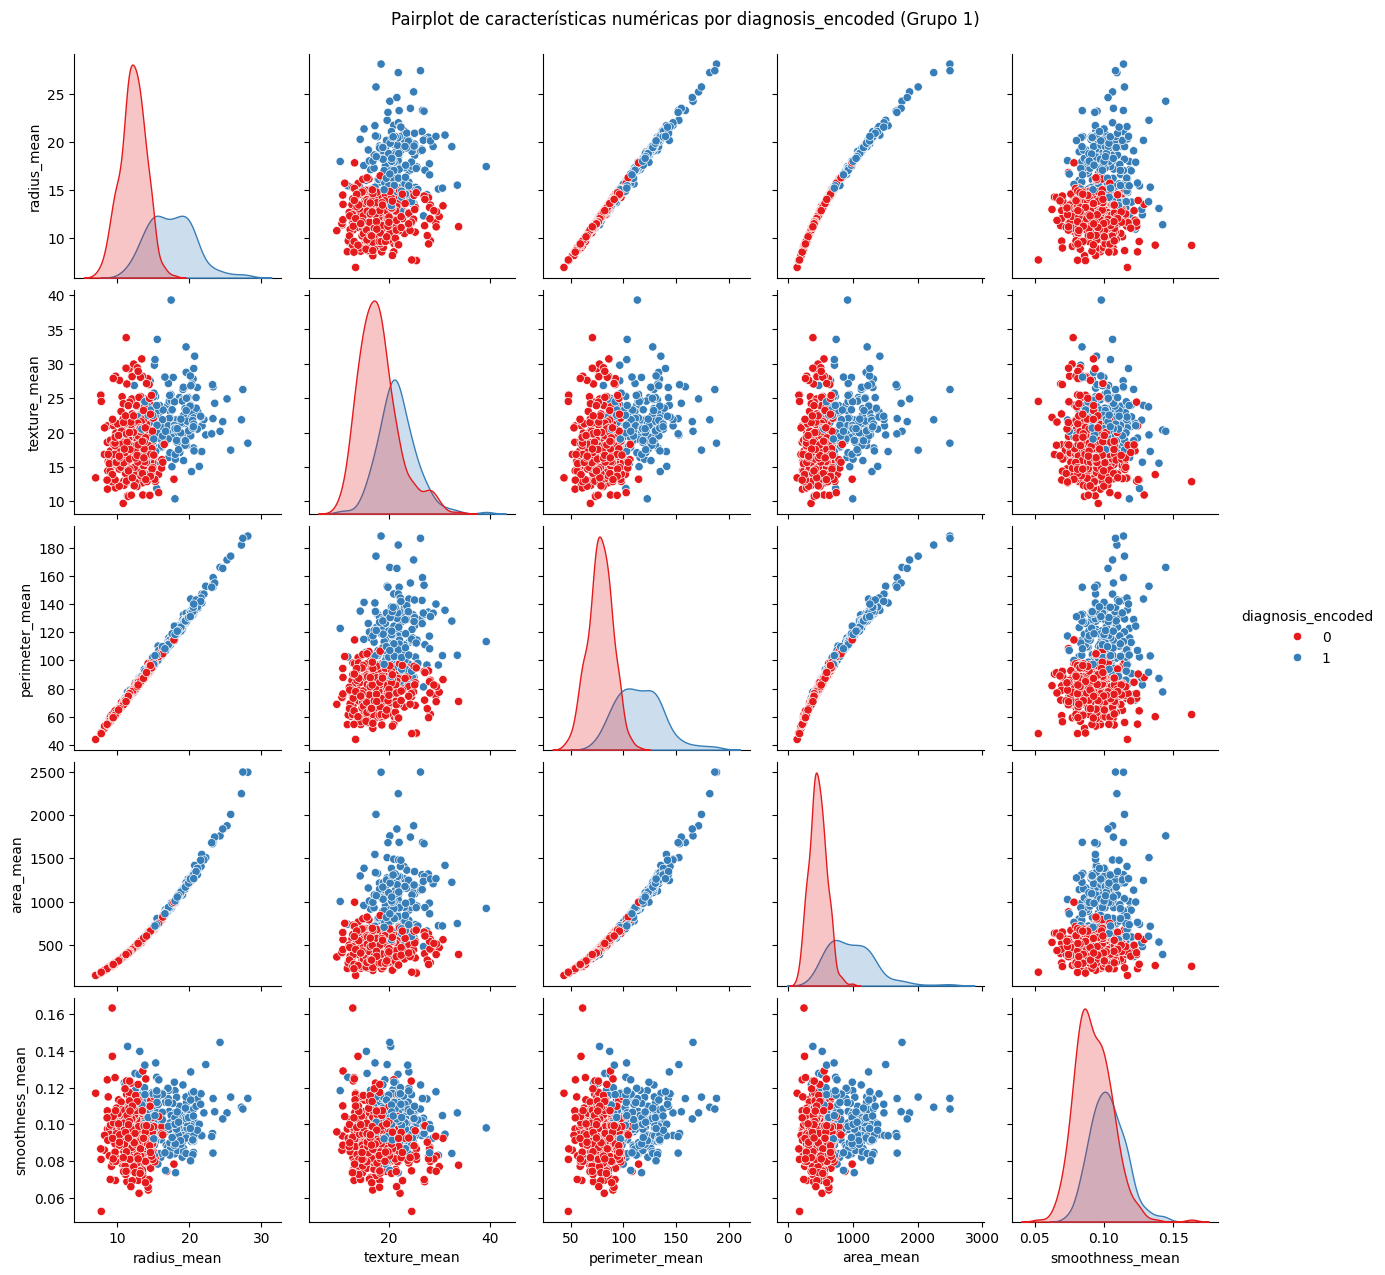

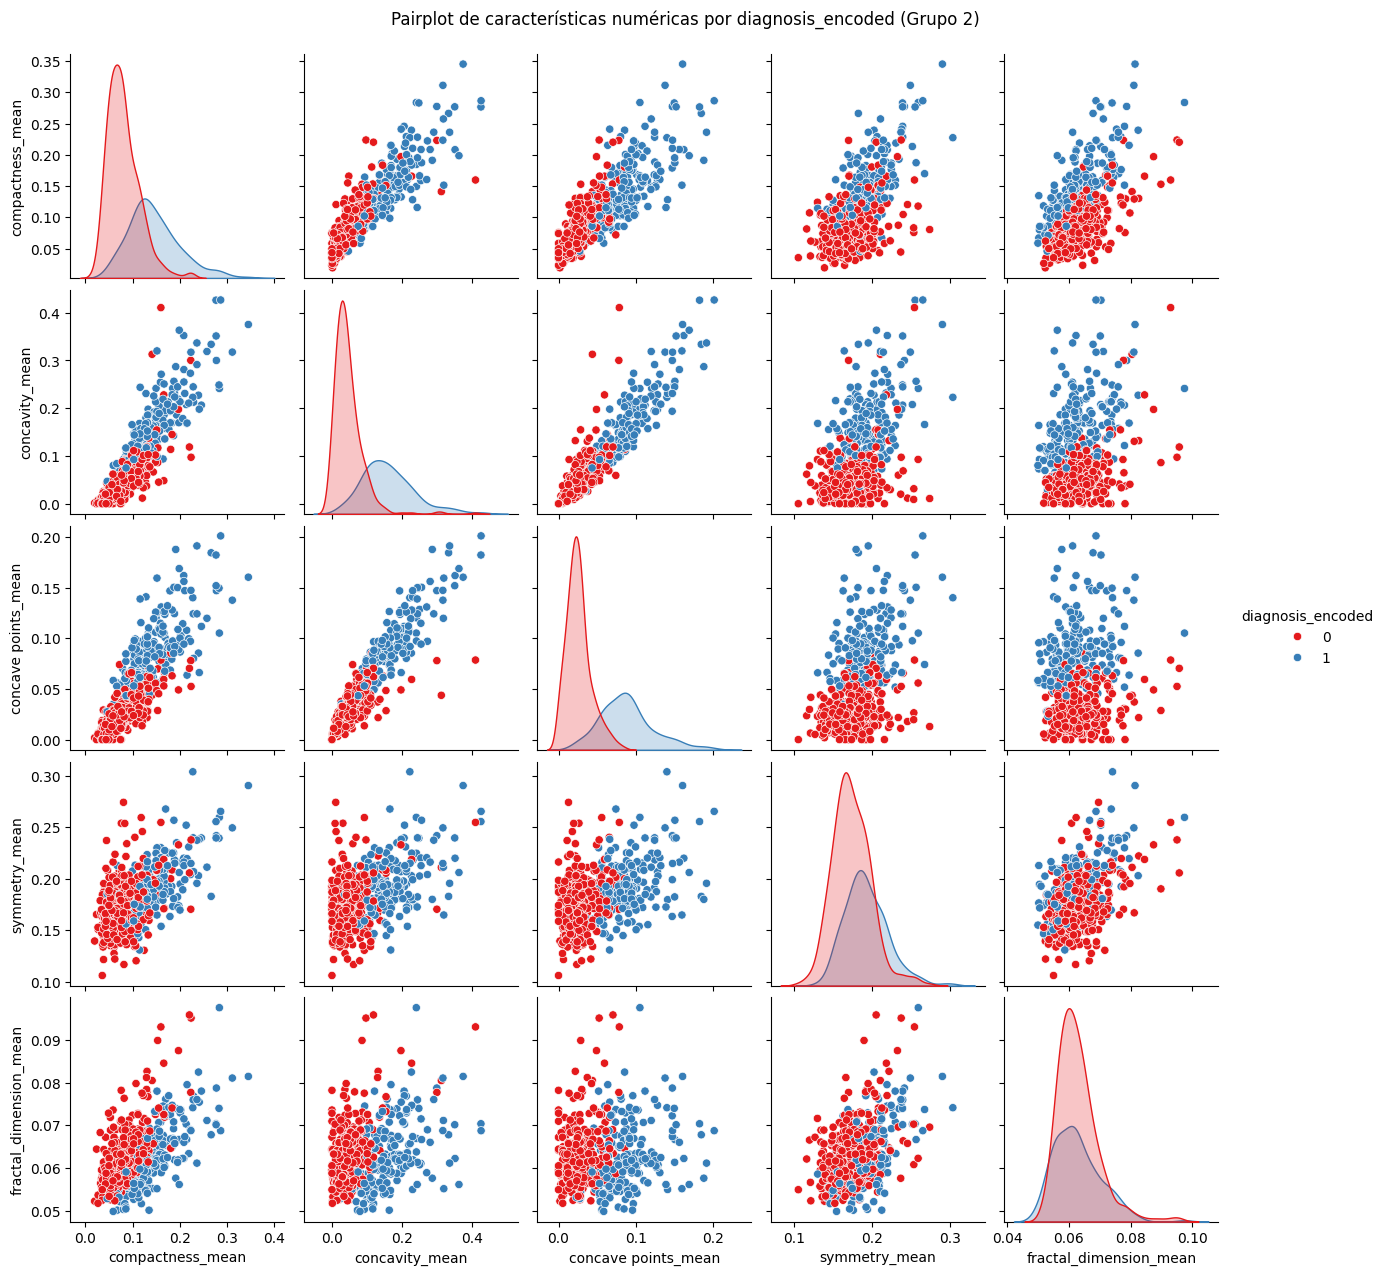

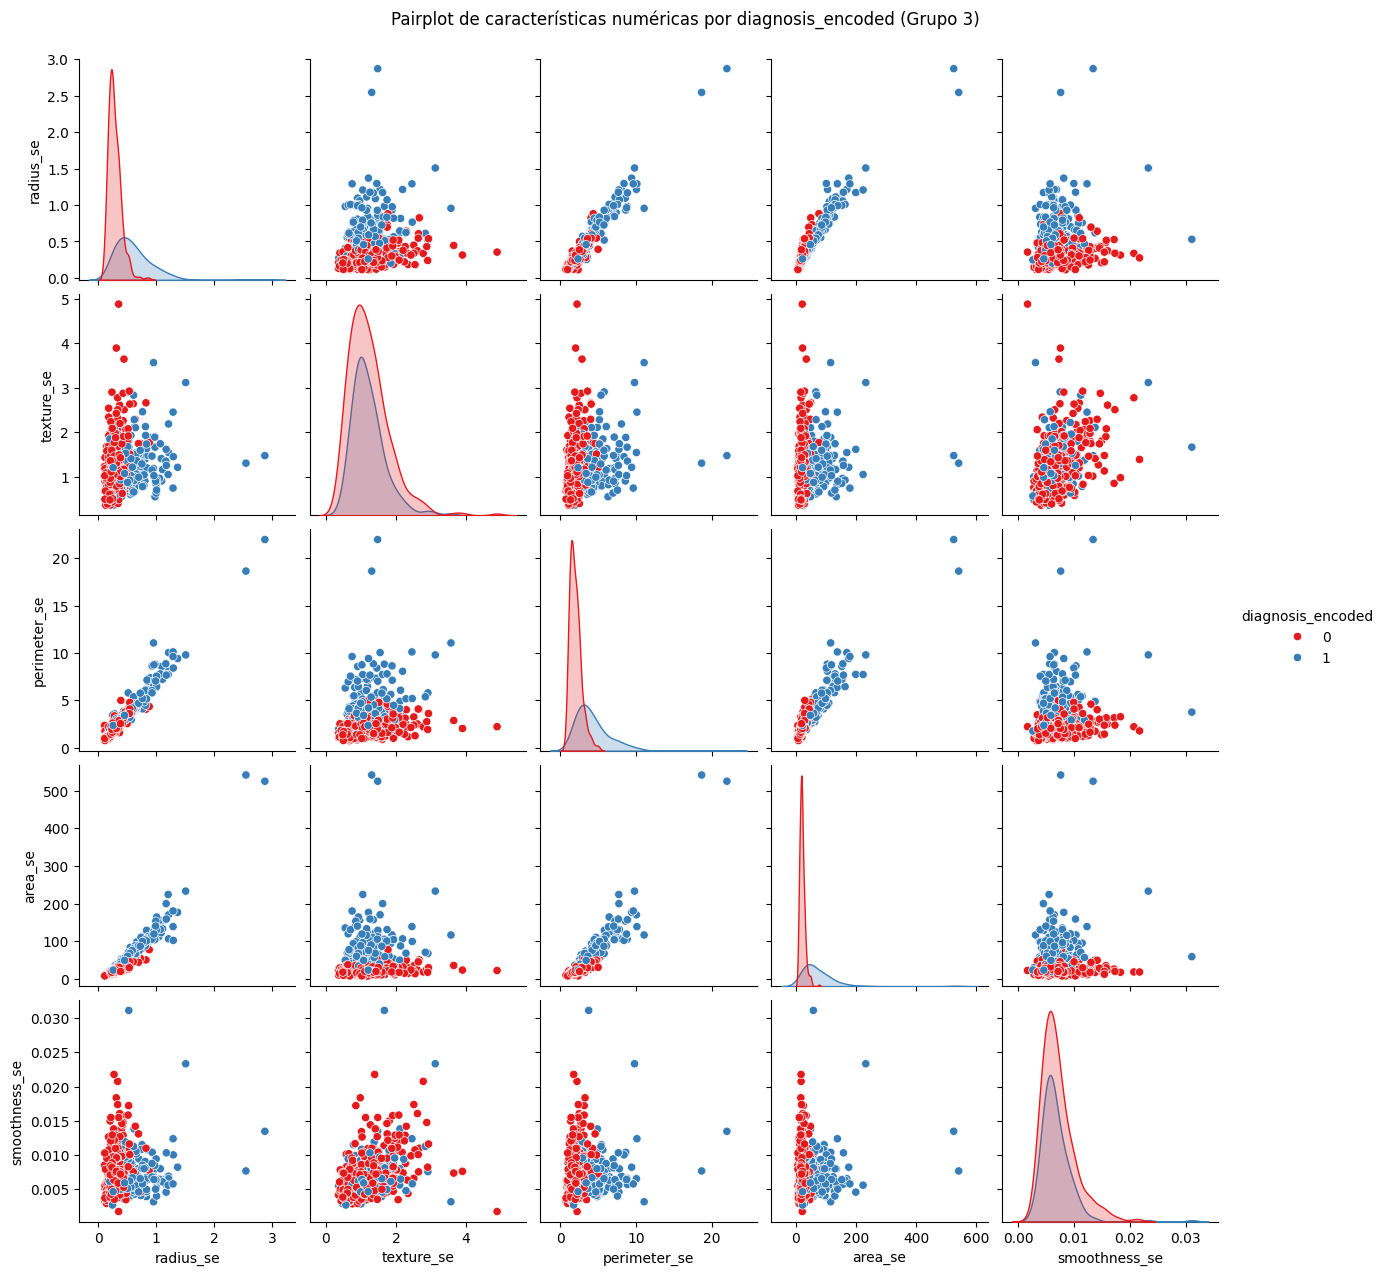

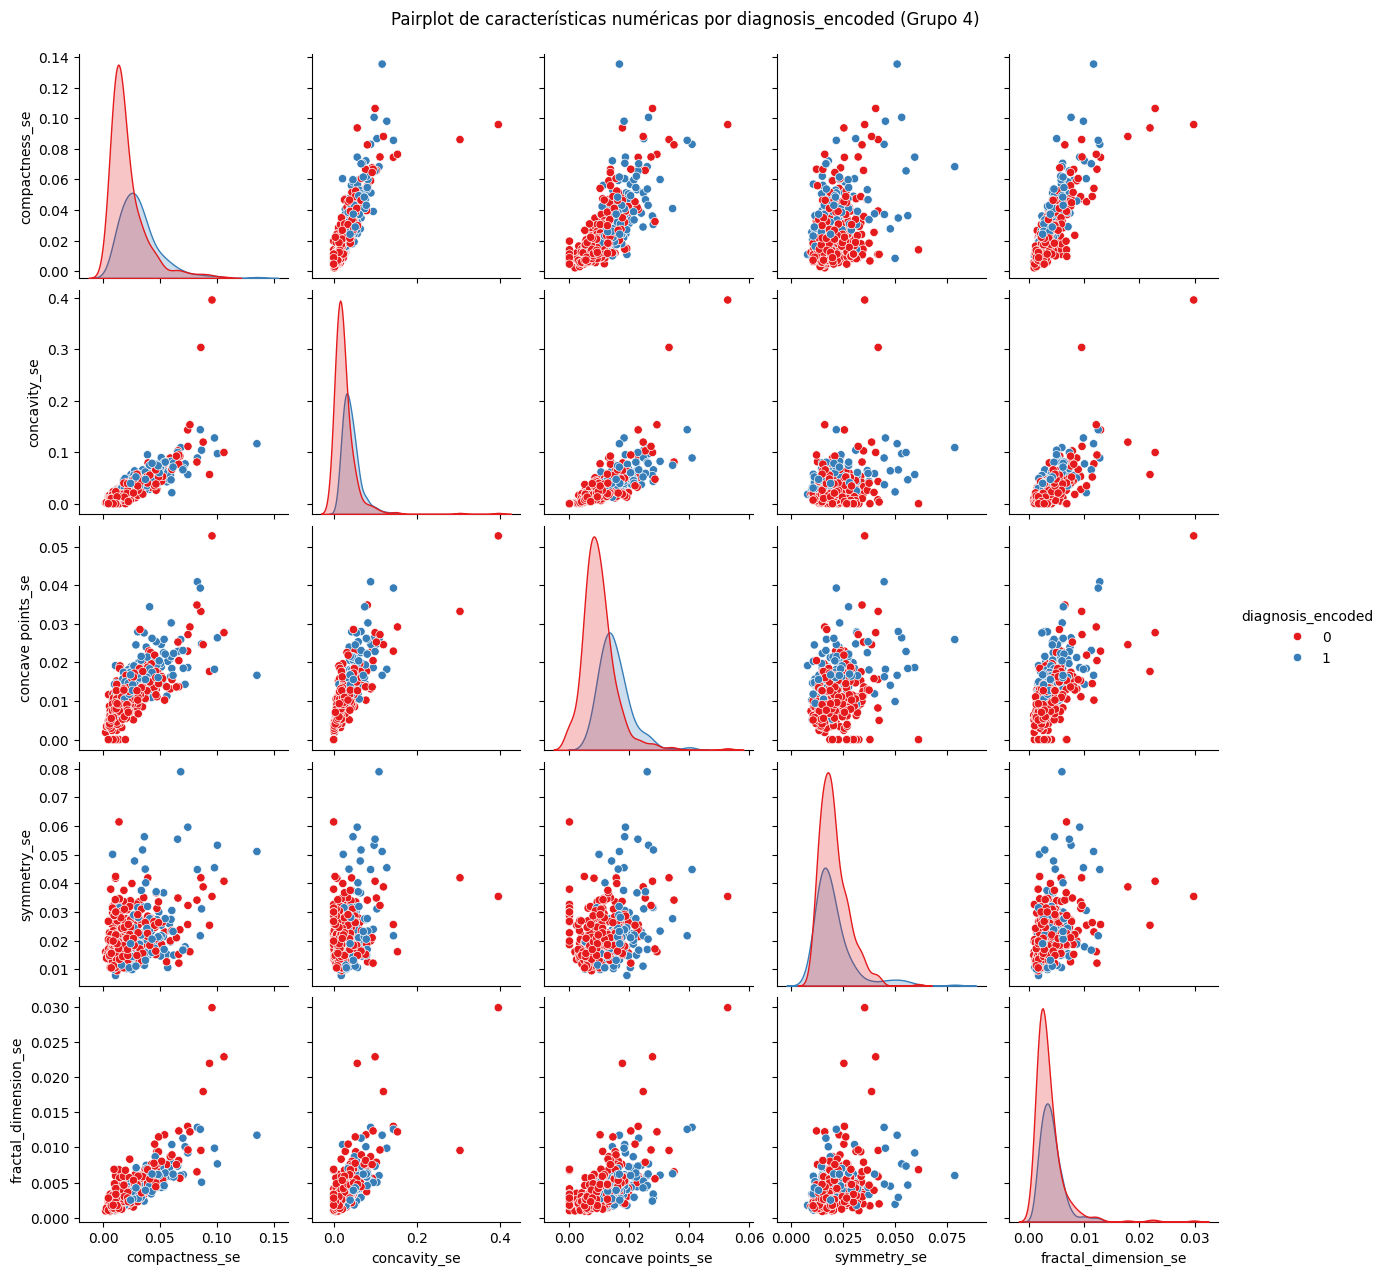

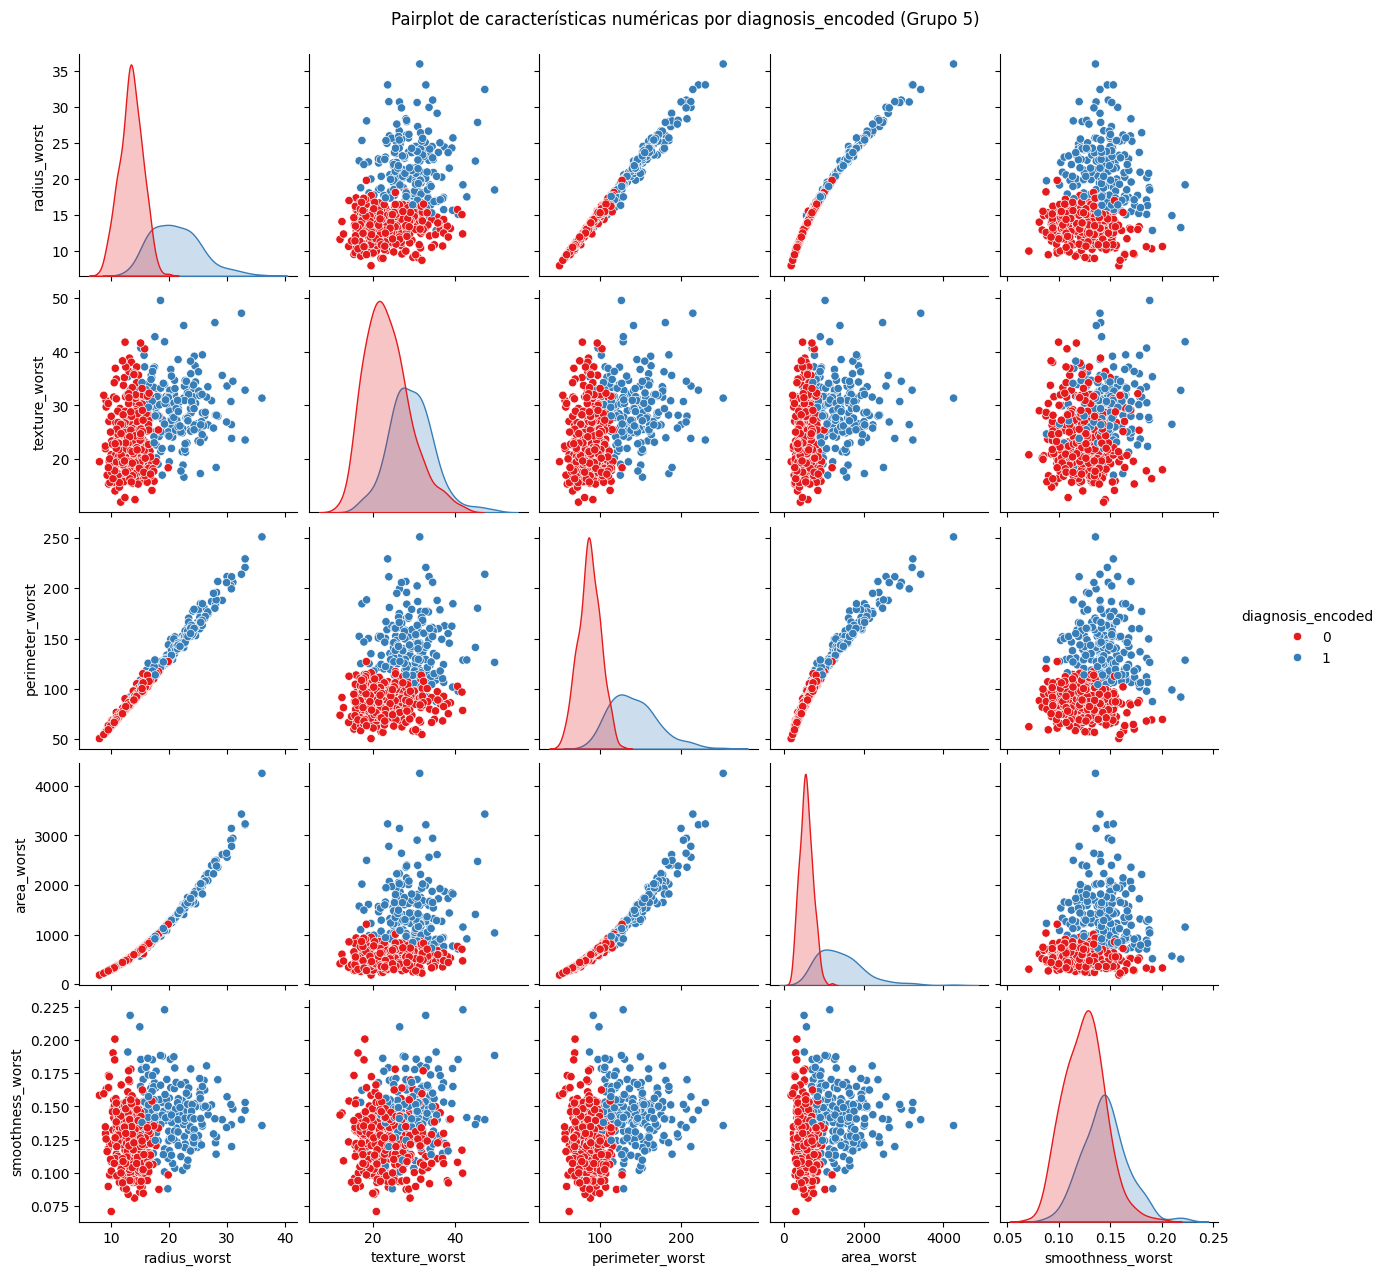

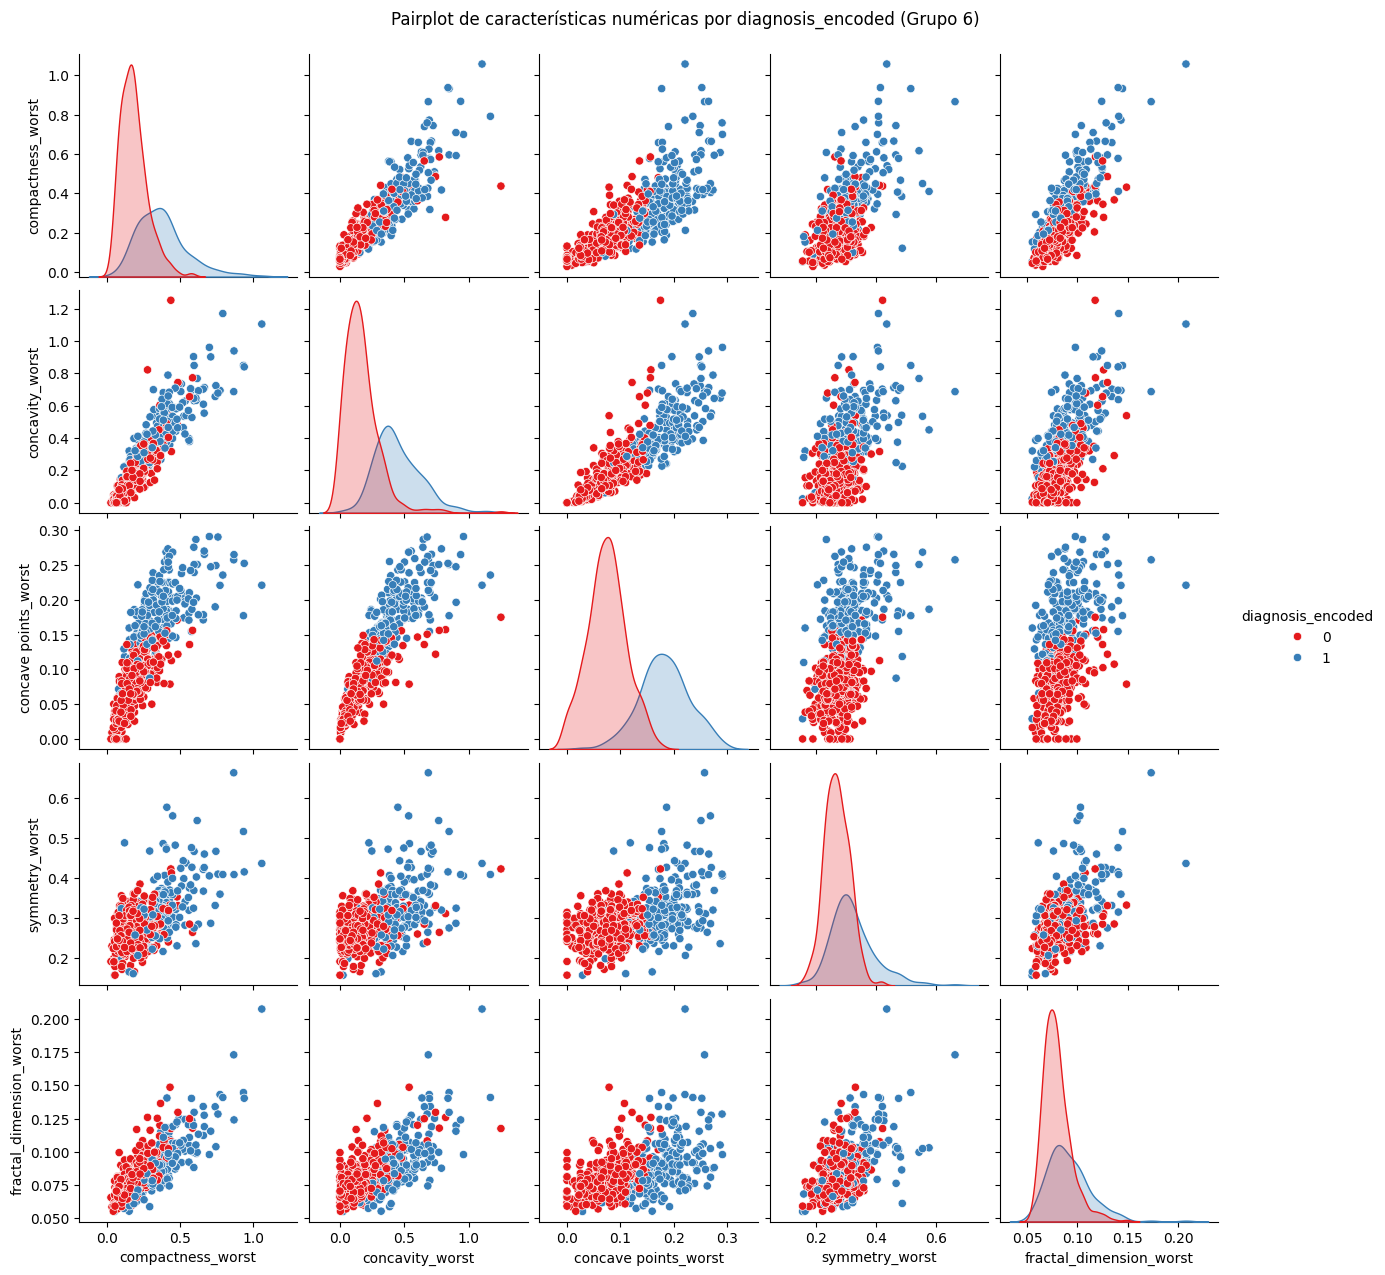

In [ ]:
tds.plot_pairplots_by_category(df, features_num, target)

### Ejercicio 5

Observa correlaciones entre las features. Utiliza un gráfico apropiado para ello. ¿Crees que sea posible eliminar algunas features para mejorar el modelo? (No hace falta que lo hagas ahora, lo haremos si es necesario en un ejercicio posterior)

In [111]:
correlation_with_target = df_train.corr()[target]
correlation_matrix = df_train.corr()
correlation_with_target 

id                         0.053402
radius_mean                0.718073
texture_mean               0.416213
perimeter_mean             0.731859
area_mean                  0.695171
smoothness_mean            0.375137
compactness_mean           0.590554
concavity_mean             0.683262
concave points_mean        0.778115
symmetry_mean              0.348123
fractal_dimension_mean    -0.014308
radius_se                  0.540126
texture_se                -0.003226
perimeter_se               0.529211
area_se                    0.517064
smoothness_se             -0.058123
compactness_se             0.254370
concavity_se               0.216047
concave points_se          0.380240
symmetry_se                0.004723
fractal_dimension_se       0.041727
radius_worst               0.766527
texture_worst              0.467479
perimeter_worst            0.774998
area_worst                 0.722875
smoothness_worst           0.430364
compactness_worst          0.588884
concavity_worst            0

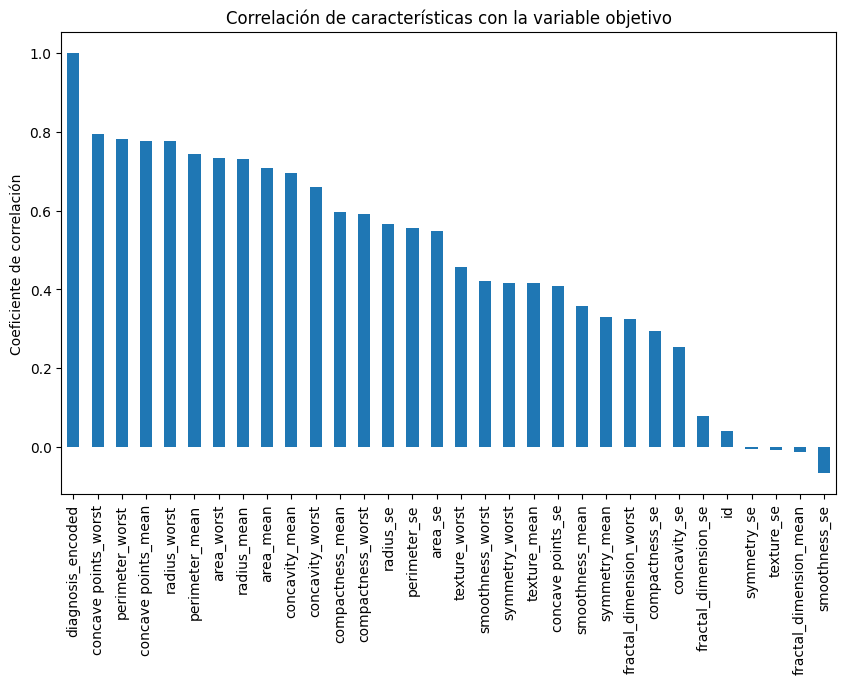

In [110]:
plt.figure(figsize=(10, 6))
correlation_with_target.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlación de características con la variable objetivo')
plt.ylabel('Coeficiente de correlación')
plt.show()

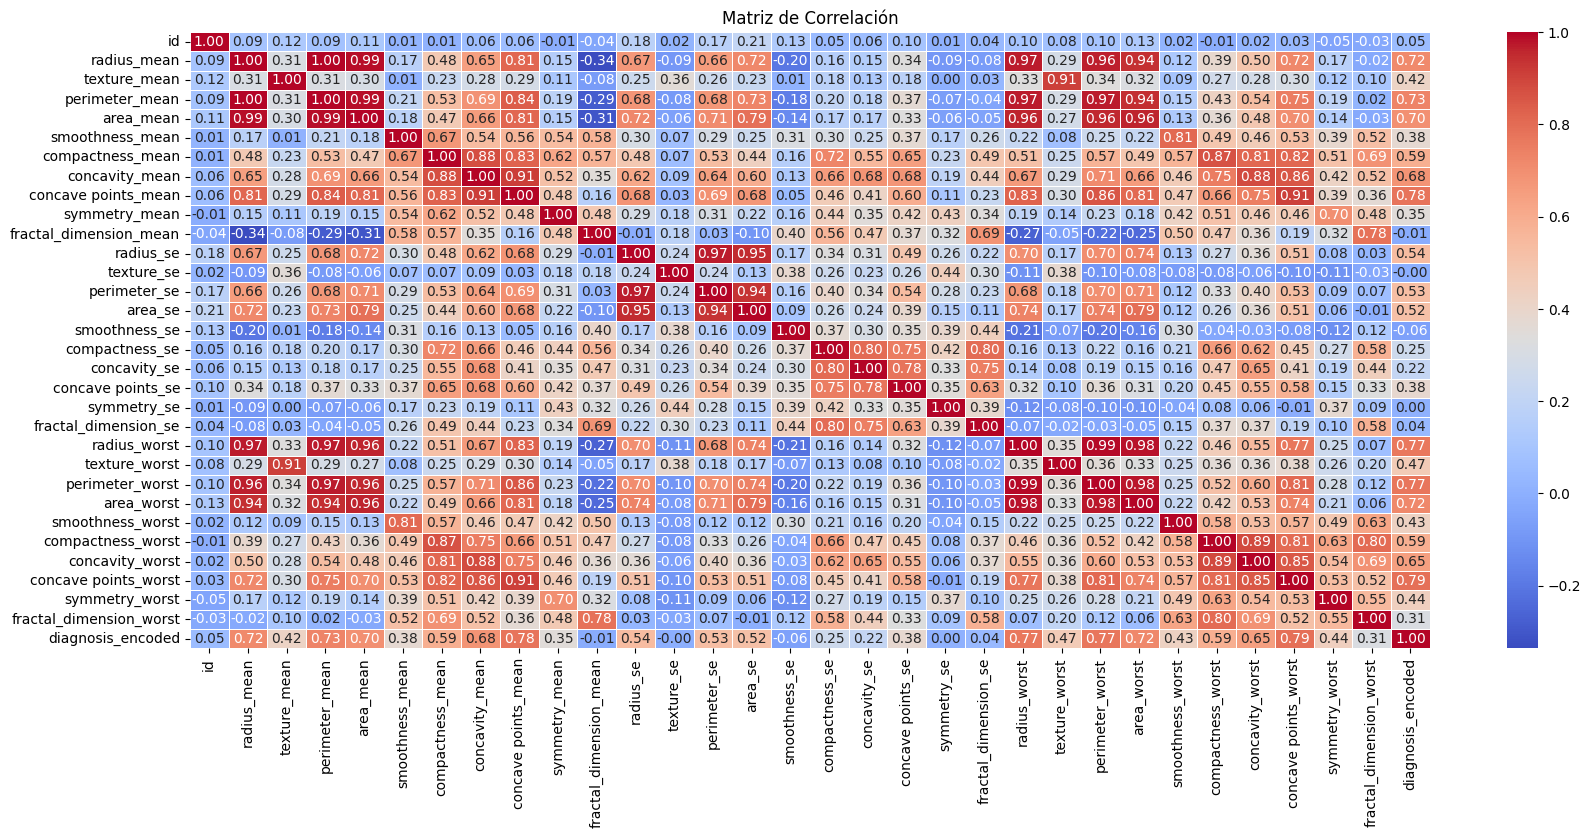

In [114]:
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [135]:
features_corr = []

for i,x in correlation_with_target.items():
 if x > 0.7:
  print(i,x)
  features_corr.append(i)
 

radius_mean 0.7180732656880486
perimeter_mean 0.7318590356528476
concave points_mean 0.7781146986158509
radius_worst 0.7665268514051525
perimeter_worst 0.7749980598062176
area_worst 0.7228752311922922
concave points_worst 0.7888853914627904
diagnosis_encoded 1.0


In [136]:
#features_corr.remove(target)
features_corr

['radius_mean',
 'perimeter_mean',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst',
 'diagnosis_encoded']

### Ejercicio 6:

Entrena (con validación cruzada) un modelo de RandomForestClassifier (con max_depth a 5) con todas las features (ojo incluso las que descartamos en el ejercicio 4) y guarda el perfomance ("balanced_accuracy") en test en una variable. Será nuestro base line de comparación

In [ ]:
rf_model = RandomForestClassifier(max_depth=5, random_state=42)


In [106]:
balanced_accuracy = make_scorer(balanced_accuracy_score)
balanced_accuracy_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=balanced_accuracy)
baseline_performance = balanced_accuracy_scores.mean()


In [108]:
baseline_performance

0.9539121868843232

### Ejercicio 7

Vamos a emplear nuestras features del análisis visual pero descartando variables correladas entre sí (emplea la matriz ya obtenida en el ejercicio 5 o bien cualquier medio que creas conveniente). Descarta features y muestra la matriz de correlación para la selección final (recuerda, parte de la lista creada en el ejercicio 4)

In [142]:
correlated_pairs = np.where(np.abs(correlation_matrix) > 0.9)
correlated_features = [(correlation_matrix.columns[x], correlation_matrix.columns[y]) 
                       for x, y in zip(*correlated_pairs) if x != y and x < y]

In [143]:
correlated_features

[('radius_mean', 'perimeter_mean'),
 ('radius_mean', 'area_mean'),
 ('radius_mean', 'radius_worst'),
 ('radius_mean', 'perimeter_worst'),
 ('radius_mean', 'area_worst'),
 ('texture_mean', 'texture_worst'),
 ('perimeter_mean', 'area_mean'),
 ('perimeter_mean', 'radius_worst'),
 ('perimeter_mean', 'perimeter_worst'),
 ('perimeter_mean', 'area_worst'),
 ('area_mean', 'radius_worst'),
 ('area_mean', 'perimeter_worst'),
 ('area_mean', 'area_worst'),
 ('concavity_mean', 'concave points_mean'),
 ('concave points_mean', 'concave points_worst'),
 ('radius_se', 'perimeter_se'),
 ('radius_se', 'area_se'),
 ('perimeter_se', 'area_se'),
 ('radius_worst', 'perimeter_worst'),
 ('radius_worst', 'area_worst'),
 ('perimeter_worst', 'area_worst')]

In [144]:
# Lista de variables a eliminar
variables_a_eliminar = ['radius_worst', 'concave points_mean', 'radius_se','perimeter_worst','area_worst','area_se']  # Ejemplo

# Elimina las variables seleccionadas
df_reducido = df.drop(columns=variables_a_eliminar)

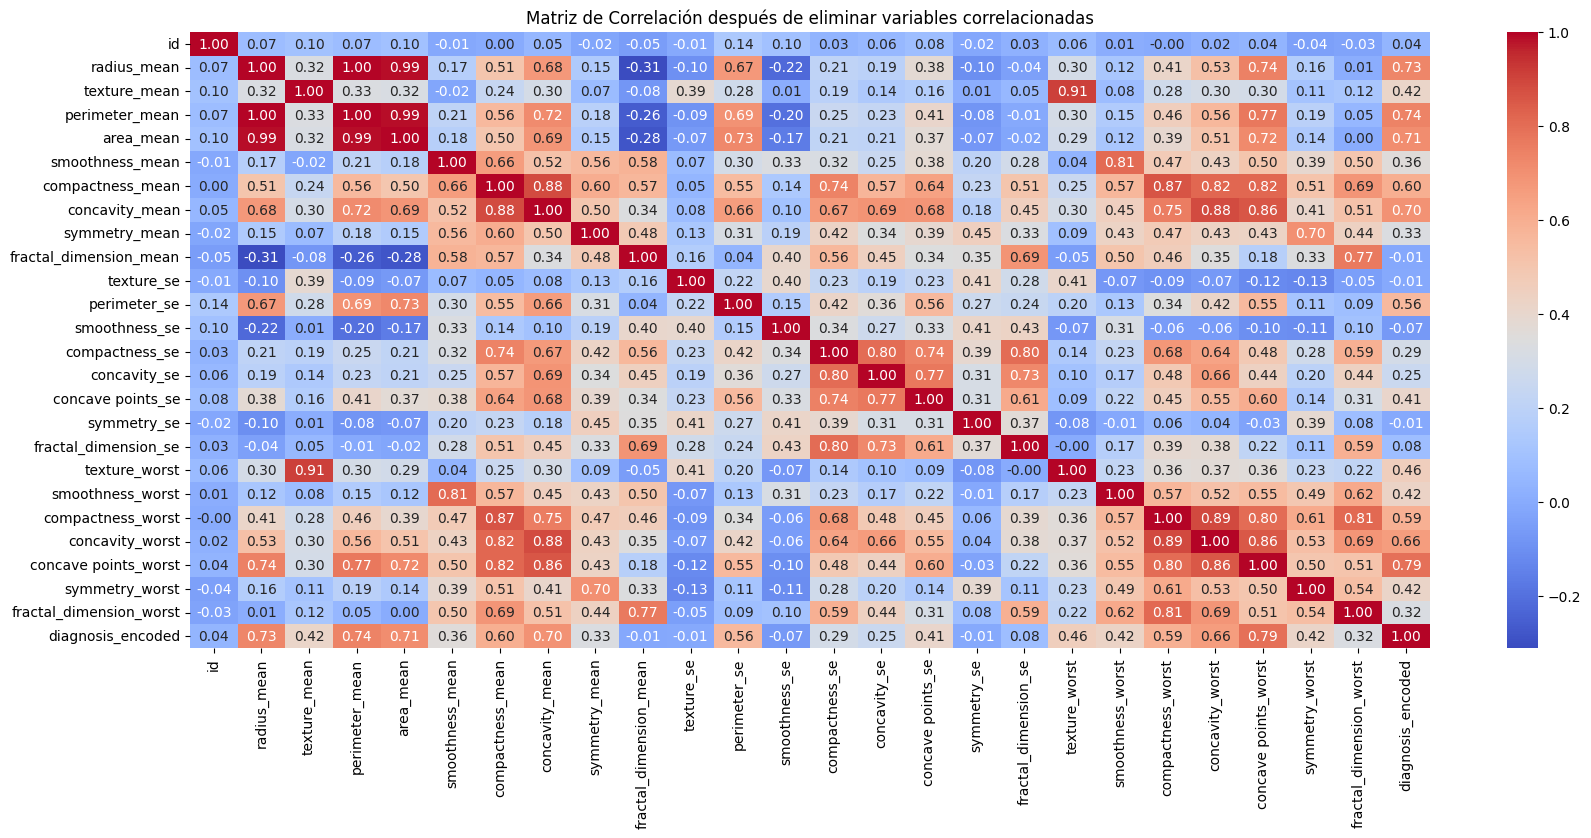

In [146]:
# Calcula la nueva matriz de correlación
reduced_correlation_matrix = df_reducido.corr()

# Visualiza la matriz de correlación
plt.figure(figsize=(20, 8))
sns.heatmap(reduced_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación después de eliminar variables correlacionadas')
plt.show()

### Ejercicio 8

Evalúa tu primer feature reduction. Entrena un modelo y evalúa su perfomance con los features que seleccionaste en el ejercicio anterios (emplea la validación cruzada)

### Ejercicio 9

Prueba ahora a hacer una feature selection utilizando ANOVA. Compara la validación cruzada con la del modelo baseline y con la del modelo anterior. (Pista: SelectKbest)

### Ejercicio 10

Prueba a hacer ahora una selección de features con RFE (Recursive Feature Elimination), hasta quedarte con 5 features. Evalúa perfomance en "balanced_accuracy" con cross_validation y compara con la baseline.

### Ejercicio 11

Prueba a eliminar features con el modelo de RandomForestClassifier (emplea SelectFromModel de sklearn). Utiliza esta vez una regresión logística para entrenar con las features escogidas y compara con el baseline. Muestra primero la importancia obtenida con el modelo baseline (que básicamente es el mismo que vamos a usar con SelectFromModel). Prueba primero para features por encima de la mediana y luego para las 5 primeras.

### Ejercicio EXTRA:

Investiga RFECV y obten el número optimo de features siguiendo esta técnica pero con el "balanced_accuracy" como métrica.